In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, :-1]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


R-squared score test data: 0.980
MAE fitted train data: 0.808


Text(0, 0.5, 'Residuals')

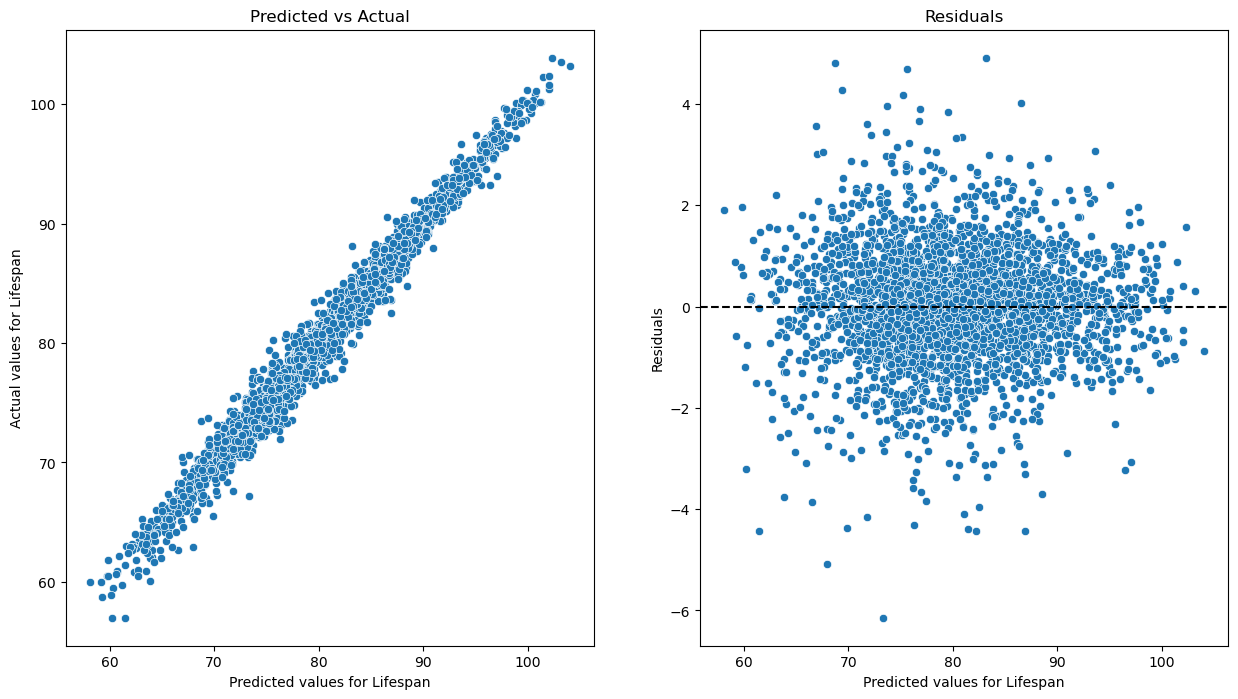

In [47]:
pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")


# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

R-squared score test data: 0.981
MAE fitted train data: 0.799


Text(0, 0.5, 'Residuals')

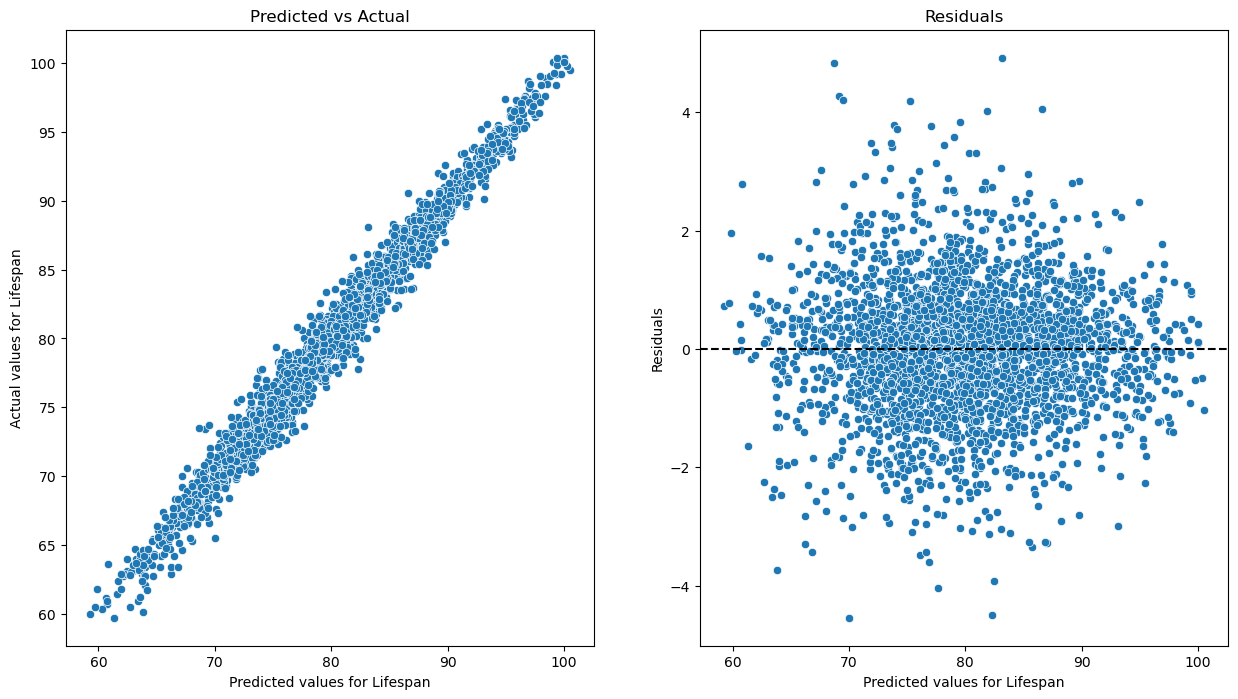

In [48]:
df_iqr_cleaned = pd.read_csv('../data/data_iqr_cleaned.csv')
X = df_iqr_cleaned.iloc[:, :-1]
y = df_iqr_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

R-squared score test data: 0.975
MAE fitted train data: 0.914


Text(0, 0.5, 'Residuals')

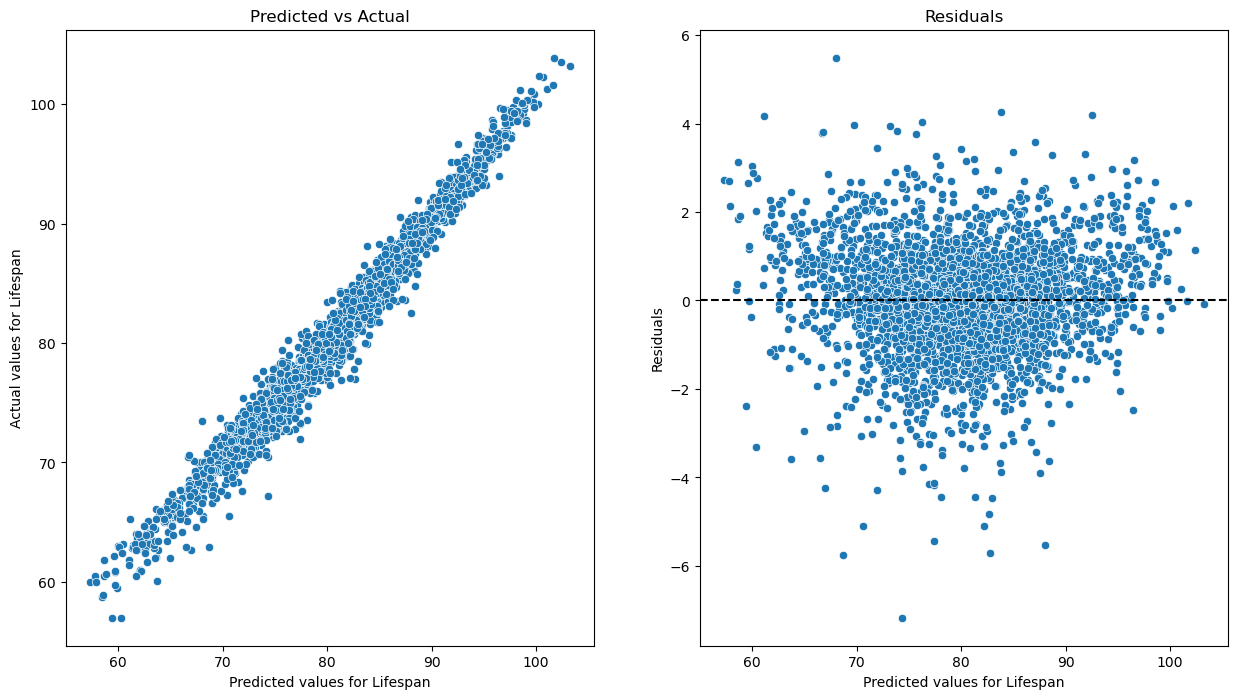

In [13]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, :-1]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('power', PowerTransformer()), ('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

In [25]:
from itertools import combinations, chain

df_cleaned = pd.read_csv('../data/data_cleaned.csv')

s = list(df_cleaned.loc[:, ~df_cleaned.columns.isin(['lifespan'])].columns)
combi = chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

feature_combinations = list(combi)[1:]
scores = dict()
for features in feature_combinations:
    X = df_cleaned.loc[:, df_cleaned.columns.isin(list(features))]
    y = df_cleaned['lifespan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    pipe = Pipeline([('model', LinearRegression())])
    # The pipeline can be used as any other estimator
    # and avoids leaking the test set into the train set
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # calculate residuals
    residuals = y_train - y_train_pred
    print(f"Features trained on: {features}")
    print(f"R-squared score train data: {pipe.score(X_train, y_train):.3f}")
    print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
    print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
    print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")
    scores[pipe.score(X_test, y_test)] = features

dict(sorted(scores.items(), reverse=True))


Features trained on: ('genetic',)
R-squared score train data: 0.903
R-squared score test data: 0.900
MAE fitted train data: 1.946
MAE fitted test data: 2.029
Features trained on: ('bmi',)
R-squared score train data: 0.006
R-squared score test data: 0.005
MAE fitted train data: 6.164
MAE fitted test data: 6.114
Features trained on: ('exercise',)
R-squared score train data: 0.005
R-squared score test data: 0.011
MAE fitted train data: 6.162
MAE fitted test data: 6.103
Features trained on: ('smoking',)
R-squared score train data: 0.061
R-squared score test data: 0.059
MAE fitted train data: 5.966
MAE fitted test data: 5.944
Features trained on: ('alcohol',)
R-squared score train data: 0.004
R-squared score test data: 0.004
MAE fitted train data: 6.168
MAE fitted test data: 6.125
Features trained on: ('sugar',)
R-squared score train data: 0.000
R-squared score test data: -0.001
MAE fitted train data: 6.183
MAE fitted test data: 6.148
Features trained on: ('genetic', 'bmi')
R-squared score 

{0.9803966378483997: ('genetic',
  'bmi',
  'exercise',
  'smoking',
  'alcohol',
  'sugar'),
 0.9796789121921208: ('genetic', 'bmi', 'exercise', 'smoking', 'alcohol'),
 0.9790447769381372: ('genetic', 'bmi', 'exercise', 'smoking', 'sugar'),
 0.9783249544238874: ('genetic', 'bmi', 'exercise', 'smoking'),
 0.9724499582647773: ('genetic', 'exercise', 'smoking', 'alcohol', 'sugar'),
 0.9716259124844127: ('genetic', 'exercise', 'smoking', 'alcohol'),
 0.970987878978641: ('genetic', 'exercise', 'smoking', 'sugar'),
 0.9701601313542554: ('genetic', 'exercise', 'smoking'),
 0.9668296264386564: ('genetic', 'bmi', 'smoking', 'alcohol', 'sugar'),
 0.9658326847358993: ('genetic', 'bmi', 'smoking', 'alcohol'),
 0.9646385818210127: ('genetic', 'bmi', 'smoking', 'sugar'),
 0.9636335298098037: ('genetic', 'bmi', 'smoking'),
 0.958938235516237: ('genetic', 'smoking', 'alcohol', 'sugar'),
 0.9578473474940784: ('genetic', 'smoking', 'alcohol'),
 0.956635409690372: ('genetic', 'smoking', 'sugar'),
 0.955